In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [2]:
events_df = pd.read_csv("../Data/interim/events.csv")
people_df = pd.read_csv("../Data/interim/people.csv")

In [3]:
events_df.head()

,Unnamed: 0,Area of Impact,Case Number,Event Number,Standard of Evenidence,Vehicle 1,Vehicle 2
0,0,Non-Collision,60005,1,Rollover/Overturn,1,9999
1,1,Other Objects Set-In-Motion,60005,2,Motor Vehicle In-Transport Strikes or is Struc...,1,2
2,2,Not Reported,60005,3,Motor Vehicle In-Transport,1,2
3,3,Non-Collision,60005,4,Fire/Explosion,1,9999
4,4,Non-Collision,60005,5,Fire/Explosion,2,9999


In [4]:
list(events_df.columns)

['Unnamed: 0',
 'Area of Impact',
 'Case Number',
 'Event Number',
 'Standard of Evenidence',
 'Vehicle 1',
 'Vehicle 2']

In [5]:
people_df.head()

,Unnamed: 0,Age,Age Name,Case Number,County,DOA Name,Day of Week,Death Day of Month,Description of Veh Coll,Driver ZIP Code,...,Vin Number,Year,Accident ZIP,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Name,Zipcode
0,0,22,22 Years,60005,SAN DIEGO (73),Died at Scene,Thursday,9,"Motor Vehicle struck by falling cargo,or somet...",77004.0,...,JS1GN7EA6821,2014,92108.0,31.2,18794.0,2620.0,63098.0,40772.0,ZCTA5 92108,92108.0
1,1,53,53 Years,60005,SAN DIEGO (73),Not Applicable,Thursday,Not Applicable (Non-Fatal),"Motor Vehicle struck by falling cargo,or somet...",91911.0,...,KMHWF25S23A7,2014,92108.0,31.2,18794.0,2620.0,63098.0,40772.0,ZCTA5 92108,92108.0
2,2,67,67 Years,60006,SAN DIEGO (73),Died at Scene,Thursday,3,None,92028.0,...,YV1AA885XM18,2013,92028.0,40.5,48103.0,6033.0,65168.0,29776.0,ZCTA5 92028,92028.0
3,3,30,30 Years,60007,SAN DIEGO (73),Not Applicable,Thursday,Not Applicable (Non-Fatal),None,92173.0,...,2T1KU4EE9BC6,2018,92154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,60,60 Years,60007,SAN DIEGO (73),Died at Scene,Thursday,4,None,NaN,...,NaN,2018,92154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
list(people_df.columns)

['Unnamed: 0',
 'Age',
 'Age Name',
 'Case Number',
 'County',
 'DOA Name',
 'Day of Week',
 'Death Day of Month',
 'Description of Veh Coll',
 'Driver ZIP Code',
 'Drunk Driver',
 'Hour',
 'Injury Severity Name',
 'Lat',
 'Lng',
 'Make',
 'Make/Model',
 'Model',
 'Month',
 'Race',
 'Road Type',
 'Sex',
 'Speed Limit Exceeded',
 'Speed limit',
 'Time of Accident',
 'Traveled Speed Veh',
 'Type of Vehicle',
 'Vin Number',
 'Year',
 'Accident ZIP',
 'Median Age',
 'Population',
 'Poverty Count',
 'Household Income',
 'Per Capita Income',
 'Name',
 'Zipcode']

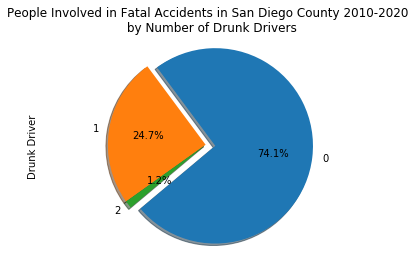

In [7]:
drunk_driver = people_df["Drunk Driver"].value_counts()
drunk_driver.plot(kind="pie", startangle=220, shadow=True, autopct="%1.1f%%", explode=(0.1,0,0))
plt.title("People Involved in Fatal Accidents in San Diego County 2010-2020 \n by Number of Drunk Drivers")
plt.axis('equal')
#plt.legend(loc="best")
#plt.tight_layout()
plt.savefig("../Images/DrunkDrivers.png")

In [8]:
people_df["Speed Limit Exceeded"].value_counts()

No                                             2398
Yes, Too Fast for Conditions                    364
Yes                                             215
Unknown                                          95
Yes, Exceeded Speed Limit                        39
Yes, Specifics Unknown                           21
Reported as Unknown                               9
No Driver Present/Unknown if Driver Present       7
Yes, Racing                                       3
Name: Speed Limit Exceeded, dtype: int64

In [9]:
people_df["Speed Limit Exceeded"] = people_df["Speed Limit Exceeded"].replace({"Yes, Too Fast for Conditions": "Yes",
                                                                              "Yes, Exceeded Speed Limit": "Yes",
                                                                              "Yes, Specifics Unknown": "Yes",
                                                                              "Yes, Racing": "Yes",
                                                                              "Reported as Unknown": "Unknown",
                                                                              "No Driver Present/Unknown if Driver Present": "Unknown"})


Text(0.5, 1.0, 'Was the Driver Speeding?')

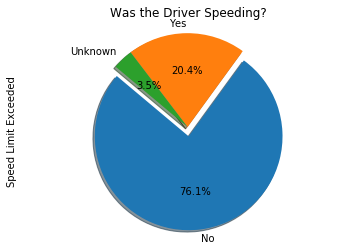

In [10]:
speeding = people_df["Speed Limit Exceeded"].value_counts()
speeding.plot(kind="pie", startangle=140, shadow=True, autopct="%1.1f%%", explode=(0.1,0,0))
plt.axis('equal')
plt.title('Was the Driver Speeding?')

In [11]:
day_of_week = people_df["Day of Week"].value_counts()
my_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week = [day_of_week[i] for i in my_order]
day_of_week

[458, 396, 369, 504, 544, 739, 694]

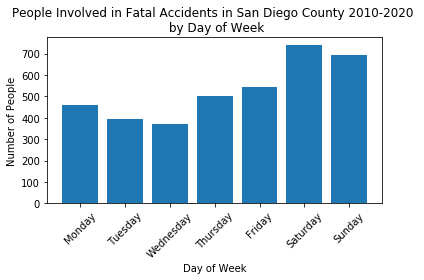

In [12]:
x_axis = np.arange(len(day_of_week))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, day_of_week)
plt.title("People Involved in Fatal Accidents in San Diego County 2010-2020 \n by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of People")
plt.xticks(tick_locations, my_order, rotation=45)
plt.tight_layout()
plt.savefig("../Images/DayofWeek.png")

In [13]:
days = people_df.groupby("Day of Week")
days_drunk_df = pd.DataFrame(days["Drunk Driver"].value_counts())
days_drunk_df

Drunk Driver
Day of Week Drunk Driver              
Friday      0                      398
            1                      134
            2                       12
Monday      0                      353
            1                      101
            2                        4
Saturday    0                      476
            1                      256
            2                        7
Sunday      0                      435
            1                      238
            2                       21
Thursday    0                      433
            1                       71
Tuesday     0                      341
            1                       55
Wednesday   0                      307
            1                       60
            2                        2

In [14]:
days_drunk_df.loc['Friday'].loc[0]

Drunk Driver    398
Name: 0, dtype: int64

In [15]:
no_drunk_drivers = [days_drunk_df["Drunk Driver"][i][0] for i in my_order]

one_drunk_driver = [days_drunk_df["Drunk Driver"][i][1] for i in my_order]

two_drunk_drivers = [0 if len(days_drunk_df["Drunk Driver"][i]) < 3 else days_drunk_df["Drunk Driver"][i][2] for i in my_order]
two_drunk_drivers

[4, 0, 2, 0, 12, 7, 21]

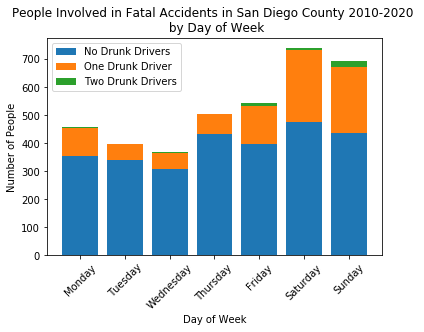

<Figure size 432x288 with 0 Axes>

In [53]:
fig, ax = plt.subplots()

# Heights of bars1 + bars2
bars = np.add(no_drunk_drivers, one_drunk_driver).tolist()

ax.bar(my_order, no_drunk_drivers, label = "No Drunk Drivers")
ax.bar(my_order, one_drunk_driver, label = "One Drunk Driver", bottom=no_drunk_drivers)
ax.bar(my_order, two_drunk_drivers, label = "Two Drunk Drivers", bottom=bars)

ax.set_ylabel('Number of People')
ax.set_title('People Involved in Fatal Accidents in San Diego County 2010-2020 \n by Day of Week')
ax.set_xlabel('Day of Week')
plt.xticks(rotation=45)
ax.legend()

#plt.tight_layout()
plt.show()
plt.savefig("../Images/DrunkDriversbyDayofWeek.png")

Text(0, 0.5, 'Number of Accidents')

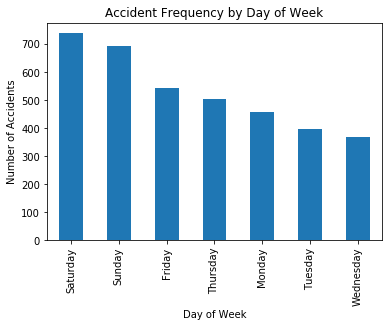

In [17]:
day_of_week = people_df["Day of Week"].value_counts()
day_of_week.plot(kind="bar")
plt.title("Accident Frequency by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")

In [18]:
# Create the bins in which Data will be held
bins = [0, 3, 7, 11, 15, 19, 24]

# Create the names for the four bins
group_names = ["Midnight - 3:59 a.m.", "4 a.m. - 7:59 a.m.", "8 a.m. - 11:59 a.m.", "Noon - 3:59 p.m.", "4 p.m. - 7:59 p.m.", "8 p.m. - 11:59 p.m."]

In [19]:
people_df["Time Range"] = pd.cut(people_df["Hour"], bins, labels=group_names, include_lowest=True)
people_df

,Unnamed: 0,Age,Age Name,Case Number,County,DOA Name,Day of Week,Death Day of Month,Description of Veh Coll,Driver ZIP Code,...,Year,Accident ZIP,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Name,Zipcode,Time Range
0,0,22,22 Years,60005,SAN DIEGO (73),Died at Scene,Thursday,9,"Motor Vehicle struck by falling cargo,or somet...",77004.0,...,2014,92108.0,31.2,18794.0,2620.0,63098.0,40772.0,ZCTA5 92108,92108.0,4 p.m. - 7:59 p.m.
1,1,53,53 Years,60005,SAN DIEGO (73),Not Applicable,Thursday,Not Applicable (Non-Fatal),"Motor Vehicle struck by falling cargo,or somet...",91911.0,...,2014,92108.0,31.2,18794.0,2620.0,63098.0,40772.0,ZCTA5 92108,92108.0,4 p.m. - 7:59 p.m.
2,2,67,67 Years,60006,SAN DIEGO (73),Died at Scene,Thursday,3,None,92028.0,...,2013,92028.0,40.5,48103.0,6033.0,65168.0,29776.0,ZCTA5 92028,92028.0,4 p.m. - 7:59 p.m.
3,3,30,30 Years,60007,SAN DIEGO (73),Not Applicable,Thursday,Not Applicable (Non-Fatal),None,92173.0,...,2018,92154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 p.m. - 7:59 p.m.
4,4,60,60 Years,60007,SAN DIEGO (73),Died at Scene,Thursday,4,None,NaN,...,2018,92154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 p.m. - 7:59 p.m.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3699,3699,61,61 Years,63569,SAN DIEGO (73),Not Applicable,Wednesday,Not Applicable (Non-Fatal),None,91945.0,...,2016,91945.0,36.9,26486.0,3931.0,55801.0,22448.0,ZCTA5 91945,91945.0,8 p.m. - 11:59 p.m.
3700,3700,25,25 Years,63569,SAN DIEGO (73),Not Applicable,Wednesday,17,None,NaN,...,2016,91945.0,36.9,26486.0,3931.0,55801.0,22448.0,ZCTA5 91945,91945.0,8 p.m. - 11:59 p.m.
3701,3701,33,33 Years,63582,SAN DIEGO (73),Not Applicable,Thursday,Not Applicable (Non-Fatal),None,93722.0,...,2017,91910.0,36.7,76027.0,12025.0,55492.0,24986.0,ZCTA5 91910,91910.0,4 p.m. - 7:59 p.m.
3702,3702,54,54 Years,63582,SAN DIEGO (73),Died at Scene,Thursday,30,None,NaN,...,2017,91910.0,36.7,76027.0,12025.0,55492.0,24986.0,ZCTA5 91910,91910.0,4 p.m. - 7:59 p.m.


In [20]:
time = people_df.groupby("Time Range")
time_df = time.count()
time_df = time_df.rename(columns={"Case Number": "Number of Cases"})
time_df

,Unnamed: 0,Age,Age Name,Number of Cases,County,DOA Name,Day of Week,Death Day of Month,Description of Veh Coll,Driver ZIP Code,...,Vin Number,Year,Accident ZIP,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Name,Zipcode
Time Range,,,,,,,,,,,,,,,,,,,,,
Midnight - 3:59 a.m.,545,545,545,545,545,545,545,545,545,459,...,390,545,543,429,429,429,429,429,429,429
4 a.m. - 7:59 a.m.,406,406,406,406,406,406,406,406,406,335,...,289,406,406,290,290,290,290,290,290,290
8 a.m. - 11:59 a.m.,393,393,393,393,393,393,393,393,393,357,...,298,393,393,329,329,329,328,329,329,329
Noon - 3:59 p.m.,611,611,611,611,611,611,611,611,611,556,...,510,611,611,481,481,481,473,481,481,481
4 p.m. - 7:59 p.m.,872,872,872,872,872,872,872,872,872,729,...,677,872,872,670,670,670,665,670,670,670
8 p.m. - 11:59 p.m.,849,849,849,849,849,849,849,849,849,689,...,643,849,849,624,624,624,623,624,624,624


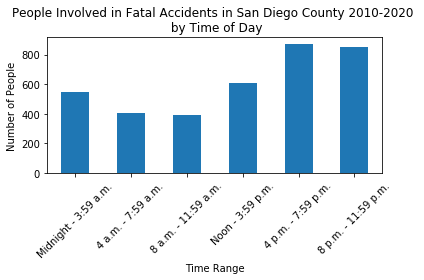

In [21]:
time_df = time_df[["Number of Cases"]]
time_df.plot(kind="bar", legend=False)
plt.title("People Involved in Fatal Accidents in San Diego County 2010-2020 \n by Time of Day")

plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("../Images/TimeofDay.png")

In [22]:
time_drunk = pd.DataFrame(time["Drunk Driver"].value_counts())
time_drunk

Drunk Driver
Time Range           Drunk Driver              
Midnight - 3:59 a.m. 1                      278
                     0                      244
                     2                       23
4 a.m. - 7:59 a.m.   0                      344
                     1                       62
8 a.m. - 11:59 a.m.  0                      361
                     1                       32
Noon - 3:59 p.m.     0                      535
                     1                       76
4 p.m. - 7:59 p.m.   0                      665
                     1                      207
8 p.m. - 11:59 p.m.  0                      581
                     1                      245
                     2                       23

In [23]:
none = []
none = [time_drunk["Drunk Driver"][i][0] for i in group_names]

one = []
one = [time_drunk["Drunk Driver"][i][1] for i in group_names]

two = [time_drunk["Drunk Driver"]["Midnight - 3:59 a.m."][2], time_drunk["Drunk Driver"]["8 p.m. - 11:59 p.m."][2]]
two.insert(1,0)
two.insert(2,0)
two.insert(3,0)
two.insert(4,0)
two

[23, 0, 0, 0, 0, 23]

In [24]:
max_cases = time_df["Number of Cases"].max()
max_cases

872

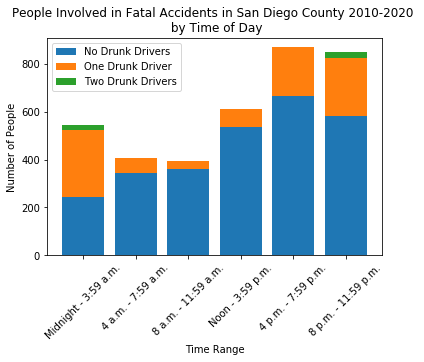

<Figure size 432x288 with 0 Axes>

In [25]:
fig, ax = plt.subplots()

# Heights of bars1 + bars2
bars1 = np.add(none, one).tolist()

ax.bar(group_names, none, label = "No Drunk Drivers")
ax.bar(group_names, one, label = "One Drunk Driver", bottom=none)
ax.bar(group_names, two, label = "Two Drunk Drivers", bottom=bars1)

ax.set_ylabel('Number of People')
ax.set_title('People Involved in Fatal Accidents in San Diego County 2010-2020 \n by Time of Day')
ax.set_xlabel('Time Range')
plt.xticks(rotation=45)
ax.legend()

plt.ylim(0, 910)
#plt.tight_layout()
plt.show()
plt.savefig("../Images/DrunkDriversbyTimeofDay.png")

In [26]:
time = people_df.groupby("Time Range")
time_df = time.count()
time_df

,Unnamed: 0,Age,Age Name,Case Number,County,DOA Name,Day of Week,Death Day of Month,Description of Veh Coll,Driver ZIP Code,...,Vin Number,Year,Accident ZIP,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Name,Zipcode
Time Range,,,,,,,,,,,,,,,,,,,,,
Midnight - 3:59 a.m.,545,545,545,545,545,545,545,545,545,459,...,390,545,543,429,429,429,429,429,429,429
4 a.m. - 7:59 a.m.,406,406,406,406,406,406,406,406,406,335,...,289,406,406,290,290,290,290,290,290,290
8 a.m. - 11:59 a.m.,393,393,393,393,393,393,393,393,393,357,...,298,393,393,329,329,329,328,329,329,329
Noon - 3:59 p.m.,611,611,611,611,611,611,611,611,611,556,...,510,611,611,481,481,481,473,481,481,481
4 p.m. - 7:59 p.m.,872,872,872,872,872,872,872,872,872,729,...,677,872,872,670,670,670,665,670,670,670
8 p.m. - 11:59 p.m.,849,849,849,849,849,849,849,849,849,689,...,643,849,849,624,624,624,623,624,624,624


Text(0.5, 1.0, 'Accident Frequency by Time of Day')

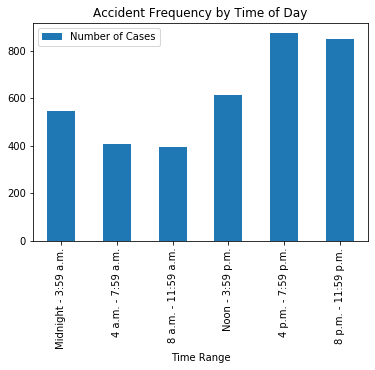

In [27]:
time_df = time_df[["Case Number"]]
time_df = time_df.rename(columns={"Case Number": "Number of Cases"})
time_df.plot(kind="bar")
plt.title("Accident Frequency by Time of Day")

In [28]:
people_df["Sex"].value_counts()

Male                   2399
Female                 1230
Unknown                  63
Reported as Unknown      11
Not Reported              1
Name: Sex, dtype: int64

In [29]:
people_df["Sex"] = people_df["Sex"].replace({"Reported as Unknown": "Unknown",
                                            "Not Reported": "Unknown"})
gender = people_df["Sex"].value_counts()
gender

Male       2399
Female     1230
Unknown      75
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Gender of Driver')

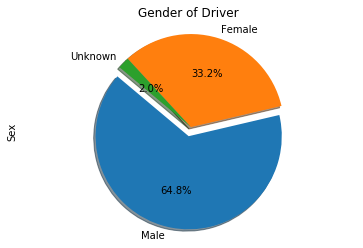

In [30]:
gender.plot(kind="pie", startangle=140, shadow=True, autopct="%1.1f%%", explode=(0.1,0,0))
plt.axis('equal')
plt.title("Gender of Driver")

In [31]:
death1= people_df.groupby(['Case Number','DOA Name'])
death1.head()

,Unnamed: 0,Age,Age Name,Case Number,County,DOA Name,Day of Week,Death Day of Month,Description of Veh Coll,Driver ZIP Code,...,Year,Accident ZIP,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Name,Zipcode,Time Range
0,0,22,22 Years,60005,SAN DIEGO (73),Died at Scene,Thursday,9,"Motor Vehicle struck by falling cargo,or somet...",77004.0,...,2014,92108.0,31.2,18794.0,2620.0,63098.0,40772.0,ZCTA5 92108,92108.0,4 p.m. - 7:59 p.m.
1,1,53,53 Years,60005,SAN DIEGO (73),Not Applicable,Thursday,Not Applicable (Non-Fatal),"Motor Vehicle struck by falling cargo,or somet...",91911.0,...,2014,92108.0,31.2,18794.0,2620.0,63098.0,40772.0,ZCTA5 92108,92108.0,4 p.m. - 7:59 p.m.
2,2,67,67 Years,60006,SAN DIEGO (73),Died at Scene,Thursday,3,None,92028.0,...,2013,92028.0,40.5,48103.0,6033.0,65168.0,29776.0,ZCTA5 92028,92028.0,4 p.m. - 7:59 p.m.
3,3,30,30 Years,60007,SAN DIEGO (73),Not Applicable,Thursday,Not Applicable (Non-Fatal),None,92173.0,...,2018,92154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 p.m. - 7:59 p.m.
4,4,60,60 Years,60007,SAN DIEGO (73),Died at Scene,Thursday,4,None,NaN,...,2018,92154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 p.m. - 7:59 p.m.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3699,3699,61,61 Years,63569,SAN DIEGO (73),Not Applicable,Wednesday,Not Applicable (Non-Fatal),None,91945.0,...,2016,91945.0,36.9,26486.0,3931.0,55801.0,22448.0,ZCTA5 91945,91945.0,8 p.m. - 11:59 p.m.
3700,3700,25,25 Years,63569,SAN DIEGO (73),Not Applicable,Wednesday,17,None,NaN,...,2016,91945.0,36.9,26486.0,3931.0,55801.0,22448.0,ZCTA5 91945,91945.0,8 p.m. - 11:59 p.m.
3701,3701,33,33 Years,63582,SAN DIEGO (73),Not Applicable,Thursday,Not Applicable (Non-Fatal),None,93722.0,...,2017,91910.0,36.7,76027.0,12025.0,55492.0,24986.0,ZCTA5 91910,91910.0,4 p.m. - 7:59 p.m.
3702,3702,54,54 Years,63582,SAN DIEGO (73),Died at Scene,Thursday,30,None,NaN,...,2017,91910.0,36.7,76027.0,12025.0,55492.0,24986.0,ZCTA5 91910,91910.0,4 p.m. - 7:59 p.m.


In [32]:
death1.nunique()

Unnamed: 0  Age  Age Name  Case Number  County  \
Case Number DOA Name                                                         
60005       Died at Scene            1    1         1            1       1   
            Not Applicable           1    1         1            1       1   
60006       Died at Scene            1    1         1            1       1   
60007       Died at Scene            1    1         1            1       1   
            Not Applicable           1    1         1            1       1   
...                                ...  ...       ...          ...     ...   
63518       Not Applicable           2    1         1            1       1   
63569       Not Applicable           2    2         2            1       1   
63582       Died at Scene            1    1         1            1       1   
            Not Applicable           1    1         1            1       1   
63617       Died at Scene            1    1         1            1       1   

                            DOA Name  Day of Week  Death Day of Month  \
Case Number DOA Name                                                    
60005       Died at Scene          1            1                   1   
            Not Applicable         1            1                   1   
60006       Died at Scene          1            1                   1   
60007       Died at Scene          1            1                   1   
            Not Applicable         1            1                   1   
...                              ...          ...                 ...   
63518       Not Applicable         1            1                   2   
63569       Not Applicable         1            1                   2   
63582       Died at Scene          1            1                   1   
            Not Applicable         1            1                   1   
63617       Died at Scene          1            1                   1   

                            Description of Veh Coll  Driver ZIP Code  ...  \
Case Number DOA Name                                                  ...   
60005       Died at Scene                         1                1  ...   
            Not Applicable                        1                1  ...   
60006       Died at Scene                         1                1  ...   
60007       Died at Scene                         1                1  ...   
            Not Applicable                        1                1  ...   
...                                             ...              ...  ...   
63518       Not Applicable                        1                2  ...   
63569       Not Applicable                        1                2  ...   
63582       Died at Scene                         1                1  ...   
            Not Applicable                        1                1  ...   
63617       Died at Scene                         1                1  ...   

                            Year  Accident ZIP  Median Age  Population  \
Case Number DOA Name                                                     
60005       Died at Scene      1             1           1           1   
            Not Applicable     1             1           1           1   
60006       Died at Scene      1             1           1           1   
60007       Died at Scene      1             1           1           1   
            Not Applicable     1             1           1           1   
...                          ...           ...         ...         ...   
63518       Not Applicable     1             1           1           1   
63569       Not Applicable     1             1           1           1   
63582       Died at Scene      1             1           1           1   
            Not Applicable     1             1           1           1   
63617       Died at Scene      1             1           1           1   

                            Poverty Count  Household Income  \
Case Number DOA Name               

In [33]:
new = pd.DataFrame(death1.nunique())
new

Unnamed: 0  Age  Age Name  Case Number  County  \
Case Number DOA Name                                                         
60005       Died at Scene            1    1         1            1       1   
            Not Applicable           1    1         1            1       1   
60006       Died at Scene            1    1         1            1       1   
60007       Died at Scene            1    1         1            1       1   
            Not Applicable           1    1         1            1       1   
...                                ...  ...       ...          ...     ...   
63518       Not Applicable           2    1         1            1       1   
63569       Not Applicable           2    2         2            1       1   
63582       Died at Scene            1    1         1            1       1   
            Not Applicable           1    1         1            1       1   
63617       Died at Scene            1    1         1            1       1   

                            DOA Name  Day of Week  Death Day of Month  \
Case Number DOA Name                                                    
60005       Died at Scene          1            1                   1   
            Not Applicable         1            1                   1   
60006       Died at Scene          1            1                   1   
60007       Died at Scene          1            1                   1   
            Not Applicable         1            1                   1   
...                              ...          ...                 ...   
63518       Not Applicable         1            1                   2   
63569       Not Applicable         1            1                   2   
63582       Died at Scene          1            1                   1   
            Not Applicable         1            1                   1   
63617       Died at Scene          1            1                   1   

                            Description of Veh Coll  Driver ZIP Code  ...  \
Case Number DOA Name                                                  ...   
60005       Died at Scene                         1                1  ...   
            Not Applicable                        1                1  ...   
60006       Died at Scene                         1                1  ...   
60007       Died at Scene                         1                1  ...   
            Not Applicable                        1                1  ...   
...                                             ...              ...  ...   
63518       Not Applicable                        1                2  ...   
63569       Not Applicable                        1                2  ...   
63582       Died at Scene                         1                1  ...   
            Not Applicable                        1                1  ...   
63617       Died at Scene                         1                1  ...   

                            Year  Accident ZIP  Median Age  Population  \
Case Number DOA Name                                                     
60005       Died at Scene      1             1           1           1   
            Not Applicable     1             1           1           1   
60006       Died at Scene      1             1           1           1   
60007       Died at Scene      1             1           1           1   
            Not Applicable     1             1           1           1   
...                          ...           ...         ...         ...   
63518       Not Applicable     1             1           1           1   
63569       Not Applicable     1             1           1           1   
63582       Died at Scene      1             1           1           1   
            Not Applicable     1             1           1           1   
63617       Died at Scene      1             1           1           1   

                            Poverty Count  Household Income  \
Case Number DOA Name               

In [34]:
new2=pd.DataFrame(new,columns =['Case Number'])
new2

Case Number
Case Number DOA Name                   
60005       Died at Scene             1
            Not Applicable            1
60006       Died at Scene             1
60007       Died at Scene             1
            Not Applicable            1
...                                 ...
63518       Not Applicable            1
63569       Not Applicable            1
63582       Died at Scene             1
            Not Applicable            1
63617       Died at Scene             1

[2101 rows x 1 columns]

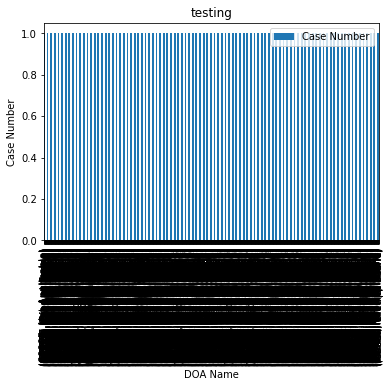

In [35]:

chart = new2.plot(kind="bar", title="testing")
chart.set_xlabel("DOA Name")
chart.set_ylabel("Case Number")

plt.show()


In [36]:
# Prepare for boxplot and ANOVA of age by number of drunk drivers
people_df.dtypes

Unnamed: 0                    int64
Age                           int64
Age Name                     object
Case Number                   int64
County                       object
DOA Name                     object
Day of Week                  object
Death Day of Month           object
Description of Veh Coll      object
Driver ZIP Code             float64
Drunk Driver                  int64
Hour                          int64
Injury Severity Name         object
Lat                         float64
Lng                         float64
Make                         object
Make/Model                   object
Model                        object
Month                        object
Race                         object
Road Type                    object
Sex                          object
Speed Limit Exceeded         object
Speed limit                 float64
Time of Accident             object
Traveled Speed Veh          float64
Type of Vehicle              object
Vin Number                  

In [37]:
people_df["Age"] = pd.to_numeric(people_df["Age"], errors='coerce')
people_df.dtypes

Unnamed: 0                    int64
Age                           int64
Age Name                     object
Case Number                   int64
County                       object
DOA Name                     object
Day of Week                  object
Death Day of Month           object
Description of Veh Coll      object
Driver ZIP Code             float64
Drunk Driver                  int64
Hour                          int64
Injury Severity Name         object
Lat                         float64
Lng                         float64
Make                         object
Make/Model                   object
Model                        object
Month                        object
Race                         object
Road Type                    object
Sex                          object
Speed Limit Exceeded         object
Speed limit                 float64
Time of Accident             object
Traveled Speed Veh          float64
Type of Vehicle              object
Vin Number                  

In [38]:
people_df_age = people_df.dropna()
people_df_age = people_df_age[people_df_age.Age != 998]
people_df_age = people_df_age[people_df_age.Age != 999]
print(len(people_df_age))

948


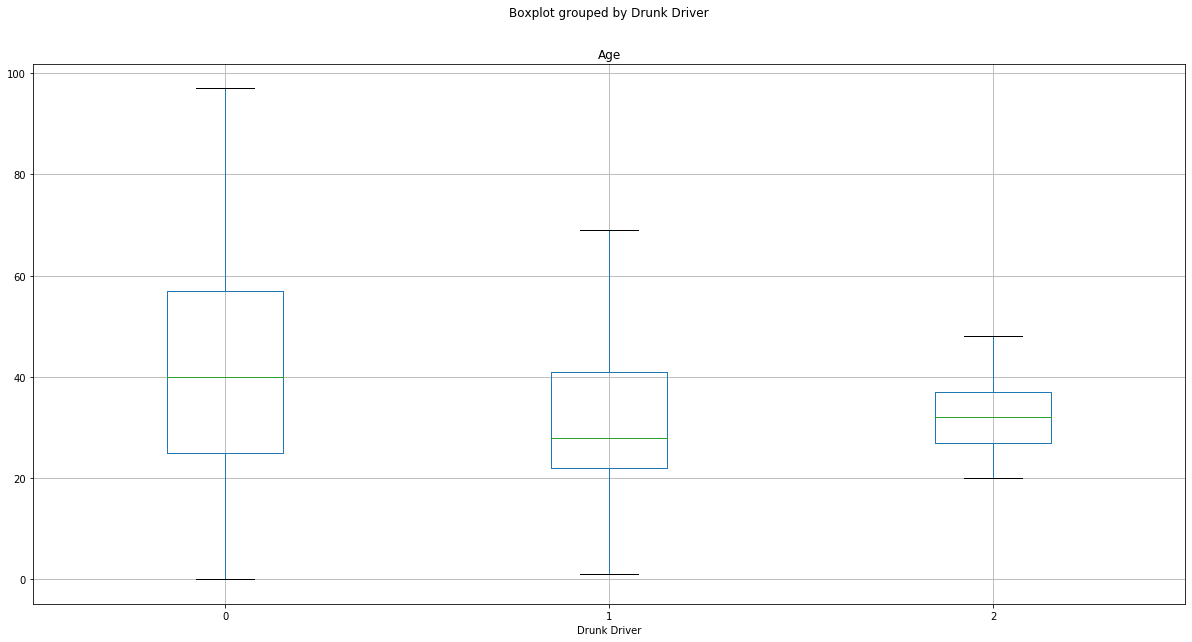

In [39]:
# Create a boxplot to compare means
people_df_age.boxplot("Age", by="Drunk Driver", figsize=(20, 10))
plt.savefig("../Images/AgeBoxplot.png")

In [40]:
from scipy import stats as st

# Extract individual groups
none = people_df_age[people_df_age["Drunk Driver"] == 0]["Age"]
one = people_df_age[people_df_age["Drunk Driver"] == 1]["Age"]
two = people_df_age[people_df_age["Drunk Driver"] == 2]["Age"]

In [41]:
# Perform the ANOVA
stats.f_oneway(none, one, two)

F_onewayResult(statistic=27.15407081179687, pvalue=3.4162595646894186e-12)

In [46]:
people_df.columns

Index(['Unnamed: 0', 'Age', 'Age Name', 'Case Number', 'County', 'DOA Name',
       'Day of Week', 'Death Day of Month', 'Description of Veh Coll',
       'Driver ZIP Code', 'Drunk Driver', 'Hour', 'Injury Severity Name',
       'Lat', 'Lng', 'Make', 'Make/Model', 'Model', 'Month', 'Race',
       'Road Type', 'Sex', 'Speed Limit Exceeded', 'Speed limit',
       'Time of Accident', 'Traveled Speed Veh', 'Type of Vehicle',
       'Vin Number', 'Year', 'Accident ZIP', 'Median Age', 'Population',
       'Poverty Count', 'Household Income', 'Per Capita Income', 'Name',
       'Zipcode', 'Time Range'],
      dtype='object')

In [47]:
populated_zips = people_df[people_df['Population'] > 0]
group = populated_zips.groupby(['ZIP Code', 'Year'])
# accidents per capita
group_populations = group.max()['Population']
group_capita_income = group.max()['Per Capita Income']
group_median_age = group.max()['Median Age']
total_drunk_drivers = group.sum()['Drunk Driver']
acc_per_capita = group.count()['Case Number'] / group_populations

KeyError: 'ZIP Code'

In [48]:
df = pd.DataFrame([acc_per_capita, group_populations]).T.rename(columns={
    'Unnamed 0': 'Death Rate'
})
st.linregress(group_populations, acc_per_capita)

NameError: name 'acc_per_capita' is not defined

In [49]:
df.plot('Population', 'Death Rate', kind='scatter')

NameError: name 'df' is not defined

In [ ]:
dd_rate = total_drunk_drivers / group_populations
df = pd.DataFrame([dd_rate, group_populations]).T.rename(columns={
    'Unnamed 0': 'Drunk Driver Rate',
})
st.linregress(group_populations, dd_rate)

In [ ]:
df.plot('Population', 'Drunk Driver Rate', kind='scatter')

In [ ]:
df = pd.DataFrame([dd_rate, group_capita_income]).T.rename(columns={
    'Unnamed 0': 'Drunk Driver Rate',
})
st.linregress(group_capita_income, dd_rate)

In [ ]:
df.plot('Per Capita Income', 'Drunk Driver Rate', kind='scatter')

In [ ]:
df = pd.DataFrame([dd_rate, group_median_age]).T.rename(columns={
    'Unnamed 0': 'Drunk Driver Rate',
})
st.linregress(group_median_age, dd_rate)

In [ ]:
df.plot('Median Age', 'Drunk Driver Rate', kind='scatter')

In [ ]:
df = pd.DataFrame([acc_per_capita, group_median_age]).T.rename(columns={
    'Unnamed 0': 'Accident Rate',
})
st.linregress(group_median_age, acc_per_capita)

In [ ]:
drunk_rate.plot('Median Age', 'Accident Rate', kind='scatter')